<a href="https://colab.research.google.com/github/naomori/codexa_ImageRecognitionForBeginner/blob/master/Chapter3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3.2: 画像読み込みと表示

画像ファイルを Python で読み込みます。
画像は[ここ](https://www.codexa.net/wp-content/uploads/2018/12/img_sample.jpg)から
ダウンロードします。

2018年11月発売の日経ソフトウェア「[タイタニックでデータ分析 機械学習入門](https://www.amazon.co.jp/%E6%97%A5%E7%B5%8C%E3%82%BD%E3%83%95%E3%83%88%E3%82%A6%E3%82%A8%E3%82%A2-2019%E5%B9%B4-1-%E6%9C%88%E5%8F%B7/dp/B07J3GTYGZ/)」はcodexa機械学習チームが執筆したそうなので、後で読んでおくことにします。

In [1]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

`%matplotlib inline` で notebook 内で図を表示できます。

Google Colab に先程の画像ファイルをアップロードします。*italicized text*

In [11]:
# from google.colab import files
# uploaded = files.upload() 
!dir

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は B0B0-58C6 です

 C:\Users\4009953\devel\github\codexa_ImageRecognitionForBeginner のディレクトリ

2019/08/09  23:15    <DIR>          .
2019/08/09  23:15    <DIR>          ..
2019/08/09  16:02    <DIR>          .git
2019/08/09  21:15    <DIR>          .ipynb_checkpoints
2019/08/09  16:03           162,994 cat.jpg
2019/08/09  16:02             3,372 Chapter1_1_BuildEnv.ipynb
2019/08/09  16:02             1,734 Chapter2_1.ipynb
2019/08/09  16:02             1,179 Chapter2_2.ipynb
2019/08/09  16:02             1,474 Chapter2_3.ipynb
2019/08/09  16:04             2,248 Chapter3_1.ipynb
2019/08/09  23:15           180,282 Chapter3_2.ipynb
2019/08/09  16:02         3,442,083 Chapter3_3.ipynb
2019/08/09  16:02             3,044 Chapter4_1.ipynb
2019/08/09  16:02            63,486 Chapter4_2.ipynb
2019/08/09  21:15            17,978 Chapter4_3.ipynb
2019/08/09  16:03       233,312,433 hiragana73.zip
2019/08/09  16:03            14,928 img_sample.jpg
2019/08

まずはカラーで画像データを読み込みます。

In [12]:
# カラーで画像データを読み込み
rgb = cv2.imread('img_sample.jpg', 1)

# オブジェクトの方を確認
print(type(rgb))

<class 'numpy.ndarray'>


OpenCV の imread() 関数を使って画像データを読み込むと、画像は Numpy 配列(numpy.ndarray)へ変換されます。

配列のサイズを以下で確認してみると、200 x 150 のRGB(3次元)画像でした。

In [13]:
print(rgb.shape)

(200, 150, 3)


この配列から 10x10 の 2次元のデータを表示してみます。

".T" により転地をしている理由は、転地をしないと、
2次元目と３次元目の(2x10)の10個分の表示をしてしまうからです。

In [14]:
print(rgb[0:10, 0:10, :2].T)

[[[139 144 176 155 147 187 165 107  26  29]
  [148 180 128 165 161 143 182  75   0   0]
  [174 175 199 236 197 206 202  17   0  51]
  [168 147 231 255 228 251 177  16   0  86]
  [162 196 163 189 195 135 120  87   0 110]
  [194 185  93 158 233 200 173  74   0 117]
  [167 169 197 243 223 219 195  49   0  91]
  [186 176 181 207 156 152 184  65   0  84]
  [177 174 205 227 194 236 212  57   2  12]
  [156 159 177 231 233 227 153  89  56   3]]

 [[ 83  72  94  79  76 104  76  40   0  22]
  [102 119  63 109 114  87 124  43   0  36]
  [138 127 150 201 171 173 170  14   7 127]
  [127  97 181 222 204 218 140   5   0 154]
  [109 134 104 147 163  91  65  53   0 150]
  [130 115  30 116 200 153 112  32   0 150]
  [102 100 138 207 199 181 144  16   0 138]
  [126 114 131 180 141 121 137  36   0 129]
  [124 119 160 205 180 201 158  13   0  33]
  [107 106 133 208 216 190  92  36  36   5]]]


In [15]:
print(rgb[0:10, 0:10, :2])

[[[139  83]
  [148 102]
  [174 138]
  [168 127]
  [162 109]
  [194 130]
  [167 102]
  [186 126]
  [177 124]
  [156 107]]

 [[144  72]
  [180 119]
  [175 127]
  [147  97]
  [196 134]
  [185 115]
  [169 100]
  [176 114]
  [174 119]
  [159 106]]

 [[176  94]
  [128  63]
  [199 150]
  [231 181]
  [163 104]
  [ 93  30]
  [197 138]
  [181 131]
  [205 160]
  [177 133]]

 [[155  79]
  [165 109]
  [236 201]
  [255 222]
  [189 147]
  [158 116]
  [243 207]
  [207 180]
  [227 205]
  [231 208]]

 [[147  76]
  [161 114]
  [197 171]
  [228 204]
  [195 163]
  [233 200]
  [223 199]
  [156 141]
  [194 180]
  [233 216]]

 [[187 104]
  [143  87]
  [206 173]
  [251 218]
  [135  91]
  [200 153]
  [219 181]
  [152 121]
  [236 201]
  [227 190]]

 [[165  76]
  [182 124]
  [202 170]
  [177 140]
  [120  65]
  [173 112]
  [195 144]
  [184 137]
  [212 158]
  [153  92]]

 [[107  40]
  [ 75  43]
  [ 17  14]
  [ 16   5]
  [ 87  53]
  [ 74  32]
  [ 49  16]
  [ 65  36]
  [ 57  13]
  [ 89  36]]

 [[ 26   0]
  [  0   0]


データの値は、画像のピクセルの値になっています。  
8bitのピクセルなので、0から255までの値を持ちます。  
numpyを使って最小値と最大値を確認してみます。

In [16]:
print(np.min(rgb))
print(np.max(rgb))

0
255


Matplotlib を使って、このNumpy配列を画像に戻すことができます。  
これには Matplotlib の imshow()を使います。

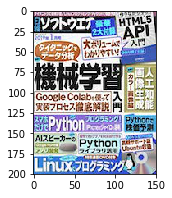

In [17]:
plt.figure(figsize=(6,3))
plt.imshow(rgb)

同じ画像データをグレースケールにするには、データの読み込み時
OpenCV.imread()関数の第二引数に 0 を渡します。
こうすることで、読み込みデータをグレースケールとして読み込みます（[cv.imerad()](http://opencv.jp/opencv-2.1/cpp/reading_and_writing_images_and_video.html#cv-imread)）。

In [18]:
grey = cv2.imread('img_sample.jpg', 0)
print(grey.shape)

(200, 150)


グレースケールは1チャネルなので、２次元の配列となります。

In [19]:
grey[0:10]

array([[109, 114, 140, ...,  71, 115, 121],
       [100, 134, 131, ...,  75, 110, 112],
       [123,  78, 155, ...,  55, 103, 110],
       ...,
       [ 56,  52,  19, ...,   0,  54,  60],
       [  7,   0,   6, ...,  10,   0,  15],
       [ 24,  35, 124, ...,  41,   4,  39]], dtype=uint8)

RGBの場合と同様に、grey でも配列の値は各ピクセルの輝度を表します。Matplotlib を使って配列から画像へ変換してみます。


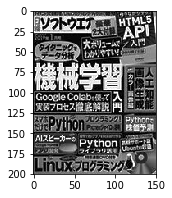

In [20]:
plt.figure(figsize=(6, 3))
plt.imshow(grey, cmap='binary')